In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Base ACO code from from https://github.com/Akavall/AntColonyOptimization/blob/master/ant_colony.py

In [ ]:
!pip install tsplib95

In [ ]:
import tsplib95
import networkx
import numpy as np
import time
import matplotlib.pyplot as plt

from numpy import savetxt
from numpy import loadtxt

In [ ]:
TSP_PATH = "/content/drive/My Drive/Natural computing/tsp/"

In [ ]:
def load_tsp(tsp_name): 
  problem = tsplib95.load(TSP_PATH+ tsp_name + ".tsp")
  # convert into a networkx.Graph
  graph = problem.get_graph()
  # convert into a numpy distance matrix
  distance_matrix = np.asarray(networkx.to_numpy_matrix(graph))
  # Change diagonal to np.inf, this is needed in order to use ant_colony.py
  np.fill_diagonal(distance_matrix,  np.inf)
  return distance_matrix


def show_history(history, timestamps):
  '''
  history (numpy.array): Array with history of shortest path length found
  '''
  plt.figure()
  plt.plot(timestamps, history)
  plt.xlabel("time elapsed")
  plt.ylabel("Distance")

In [ ]:
tsp = load_tsp("eil101")

In [ ]:
all_history = []
all_timestamps = [] 

In [ ]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice

class AntColony2(object):

    def __init__(self, distances, n_ants, n_iterations, timelimit, decay=0.5, alpha=1, beta=5, Q=100, n_best=None):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
        """
        self.timelimit = timelimit
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.Q = Q

         # keeps track of length shortest path
        self.history = []
        self.timestamps = []

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        #for i in range(self.n_iterations):
        while time.time() - time_start < self.timelimit:
            #while time.time() - time_start < self.timelimit:
            all_paths = self.gen_all_paths()
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone * self.decay
            self.spread_pheronome(all_paths, shortest_path=shortest_path, all_time_shortest_path=all_time_shortest_path)
            # keep track of length shortest path
            self.timestamps.append(time.time() - time_start)
            self.history.append(all_time_shortest_path[1])
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, shortest_path, all_time_shortest_path):
        if self.n_best is None:
            for path, dist in all_paths:
                for move in path:
                    self.pheromone[move] += self.Q/dist # 1.0 / self.distances[move]
            path, dist = all_time_shortest_path
            for move in path:
                self.pheromone[move] += self.Q/dist
        else:
            # if n_best has a value, only spread pheromones on the n_best tours
            sorted_paths = sorted(all_paths, key=lambda x: x[1])
            for path, dist in sorted_paths[:self.n_best]:
                for move in path:
                    self.pheromone[move] += self.Q/dist # 1.0 / self.distances[move]
            path, dist = all_time_shortest_path
            for move in path:
                self.pheromone[move] += self.Q/dist

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set() # tabu list
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0 # tabu list
        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move


# New section

Done in 720.61s
shorted_path: [1, 69, 27, 101, 53, 58, 40, 26, 28, 12, 80, 68, 77, 3, 79, 78, 34, 81, 33, 51, 9, 71, 35, 65, 66, 20, 30, 70, 31, 88, 7, 82, 48, 47, 36, 49, 19, 62, 10, 90, 32, 63, 11, 64, 46, 8, 45, 17, 84, 5, 60, 83, 18, 52, 89, 6, 94, 95, 97, 92, 59, 99, 96, 93, 98, 37, 100, 91, 85, 61, 16, 86, 44, 14, 38, 42, 87, 13, 2, 57, 15, 43, 41, 22, 74, 72, 73, 21, 4, 56, 75, 23, 67, 39, 25, 55, 54, 24, 29, 76, 50]
Length path: 680.0
Done in 720.38s
shorted_path: [1, 69, 27, 101, 53, 58, 40, 21, 72, 73, 74, 22, 41, 75, 56, 23, 67, 39, 4, 54, 55, 25, 24, 29, 78, 34, 35, 71, 65, 66, 20, 30, 70, 31, 88, 7, 82, 48, 47, 36, 49, 64, 63, 90, 32, 10, 62, 11, 19, 46, 8, 45, 17, 16, 61, 85, 91, 100, 37, 98, 93, 59, 99, 96, 95, 97, 92, 87, 57, 15, 43, 42, 14, 44, 38, 86, 84, 5, 60, 83, 18, 52, 89, 6, 94, 13, 2, 26, 12, 80, 68, 77, 3, 79, 81, 33, 51, 9, 50, 76, 28]
Length path: 684.0
Done in 720.58s
shorted_path: [1, 69, 27, 101, 53, 58, 40, 26, 12, 80, 68, 77, 3, 79, 33, 81, 9, 51, 20, 3

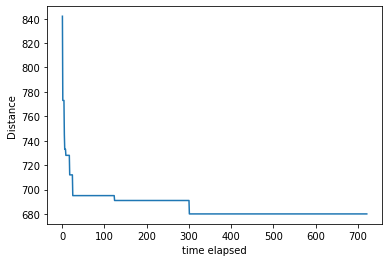

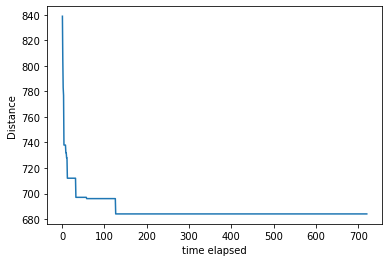

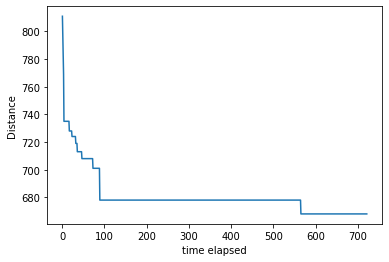

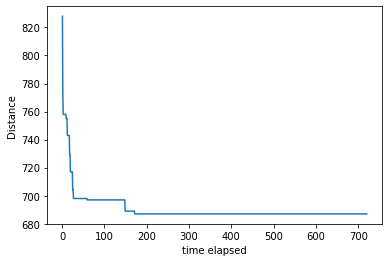

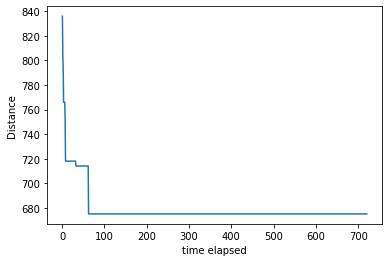

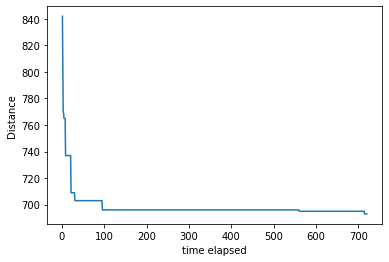

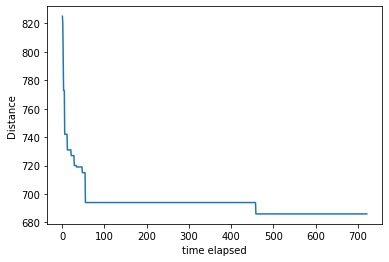

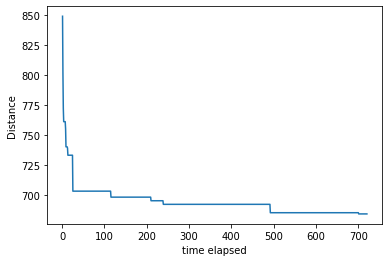

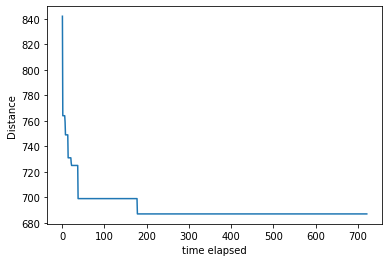

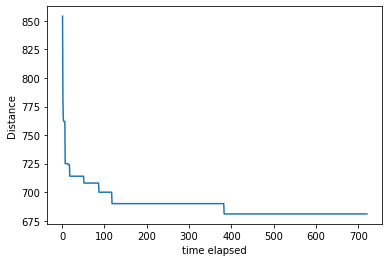

In [ ]:
#ant_colony = AntColony(tsp, n_ants=101, n_iterations=100)

for i in range(10):
  ant_colony = AntColony2(tsp, n_ants=101, Q=0.5, n_iterations=100, timelimit=720)
  time_start = time.time()
  shortest_path, length = ant_colony.run()
  time_end = time.time()

  all_history.append(ant_colony.history)
  all_timestamps.append(ant_colony.timestamps)

  print("Done in %.2fs" % (time_end - time_start,))
  shortest_path = [edge[0]+1 for edge in shortest_path]
  print ("shorted_path: {}".format(shortest_path))
  print("Length path: {}".format(length))
  show_history(ant_colony.history, ant_colony.timestamps)

In [ ]:
pad = len(max(all_history, key=len))
to_save_history =  np.array([i + [0]*(pad-len(i)) for i in all_history])
to_save_timestamps = np.array([i + [0]*(pad-len(i)) for i in all_timestamps])

In [ ]:
to_save_history.shape

(10, 799)

In [ ]:
savetxt('eil101Elitst_history.csv', to_save_history, delimiter=',')
savetxt('eil101Elitist_timestamps.csv', to_save_timestamps, delimiter=',')